# To perform Principal Component Analysis (PCA) on the Iris dataset

### Import the necessary libraries

In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


Define Methods 
1.   To Access Data Files
2.   Assessing Features
3.   Calculate Covariance Matrix
4.   Calculate Eigenvectors
5.   K-means Algo
6.   Plot Clustering








In [2]:
def load_iris_dataset(file_path):
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        dataset = list(reader)

    # Convert dataset to numpy array
    dataset = np.array(dataset)

    # Remove the header row
    dataset = dataset[1:]

    # Extract the features and labels
    features = dataset[:, :-1].astype(float)
    labels = dataset[:, -1]

    return features, labels

def calculate_mean(feature):
    return np.mean(feature)

def calculate_covariance_matrix(features):
    num_features = features.shape[1]
    covariance_matrix = np.zeros((num_features, num_features))

    for i in range(num_features):
        for j in range(num_features):
            covariance_matrix[i, j] = np.cov(features[:, i], features[:, j])[0, 1]

    return covariance_matrix

def calculate_eigenvectors(covariance_matrix):
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    return sorted_eigenvalues, sorted_eigenvectors

def project_data(features, eigenvectors, num_components):
    return np.dot(features, eigenvectors[:, :num_components])

def plot_pca(projected_data, eigenvalues):
    # Plotting the first three eigenvectors
    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], cmap='viridis')
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_zlabel('PC3')
    ax.set_title('Projected Data (PC1 vs PC2 vs PC3)')

    plt.show()

    # Plotting the eigenvalues
    plt.bar(range(len(eigenvalues)), eigenvalues)
    plt.xlabel('Component')
    plt.ylabel('Eigenvalue')
    plt.title('Eigenvalues of the Components')
    plt.show()

def kmeans_clustering(features, num_clusters, max_iterations):
    # Randomly initialize the centroids
    np.random.seed(42)
    centroids = features[np.random.choice(range(features.shape[0]), size=num_clusters, replace=False)]

    for _ in range(max_iterations):
        # Assign each data point to the closest centroid
        distances = np.linalg.norm(features[:, None] - centroids, axis=2)
        assigned_clusters = np.argmin(distances, axis=1)

        # Update the centroids
        for i in range(num_clusters):
            cluster_points = features[assigned_clusters == i]
            if len(cluster_points) > 0:
                centroids[i] = np.mean(cluster_points, axis=0)

    return assigned_clusters

def plot_clustering(features, assigned_clusters, labels):
    # Convert species labels to numeric values
    species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    species_numeric = np.array([species_mapping[l] for l in labels])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plotting the cluster output
    ax1.scatter(features[:, 0], features[:, 1], c=assigned_clusters, cmap='viridis')
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('Cluster Output')

    # Plotting the actual species
    ax2.scatter(features[:, 0], features[:, 1], c=species_numeric, cmap='viridis')
    ax2.set_xlabel('Feature 1')
    ax2.set_ylabel('Feature 2')
    ax2.set_title('Actual Species')

    plt.show()


In [3]:
# Load the Iris dataset
file_path = '/content/Iris Dataset.csv'
features, labels = load_iris_dataset(file_path)

### Data PreProcessing : Fit the PCA model on the standardized features and transform the data into the principal component space.

In [4]:
# Remove the Species column
features = features[:, :-1]
# Center the features
centered_features = features - np.apply_along_axis(calculate_mean, axis=0, arr=features)



*   Calculate the covariance matrix: The covariance matrix represents the relationships between the features in the dataset

*   Calculate the eigenvectors and eigenvalues: Eigenvectors and eigenvalues are obtained by performing eigendecomposition on the covariance matrix.
*   Project the data onto the eigenvectors: To reduce the dimensionality of the data, you can project it onto the eigenvectors. 






In [5]:
# Calculate the covariance matrix
covariance_matrix = calculate_covariance_matrix(centered_features)

# Calculate the eigenvectors and eigenvalues
eigenvalues, eigenvectors = calculate_eigenvectors(covariance_matrix)

# Project the data onto the first three eigenvectors
projected_data = project_data(centered_features, eigenvectors, num_components=3)



### Plot the projected data and the corresponding eigenvalues.

<ipython-input-2-1fd182155ccf>:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(projected_data[:, 0], projected_data[:, 1], projected_data[:, 2], cmap='viridis')


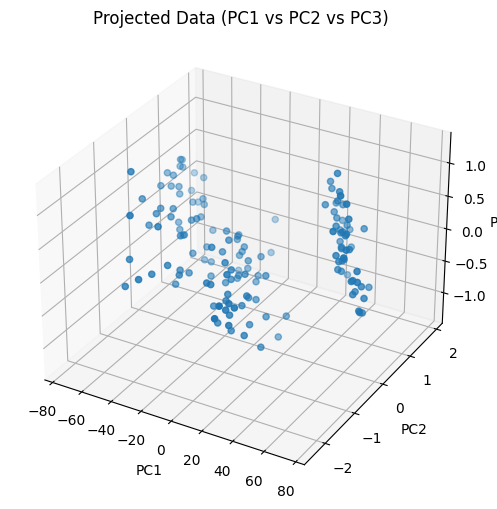

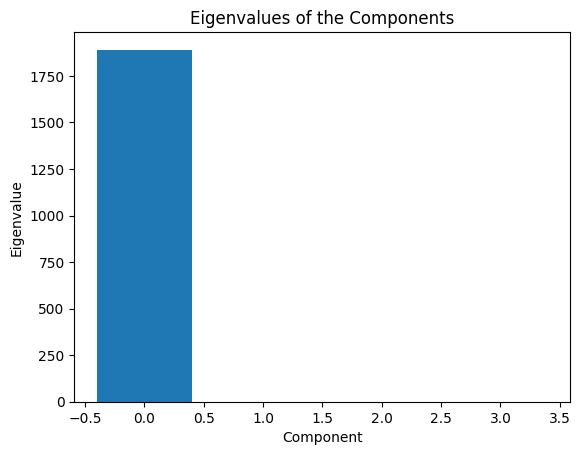

In [6]:
# Plot the PCA results
plot_pca(projected_data, eigenvalues)

### Create an instance of the PCA class and specify the number of components you want to keep.

In [7]:
# Perform K-means clustering
num_clusters = 3
max_iterations = 100
assigned_clusters = kmeans_clustering(features, num_clusters, max_iterations)


### Visualize the data in the reduced-dimensional space, you can plot the transformed data.

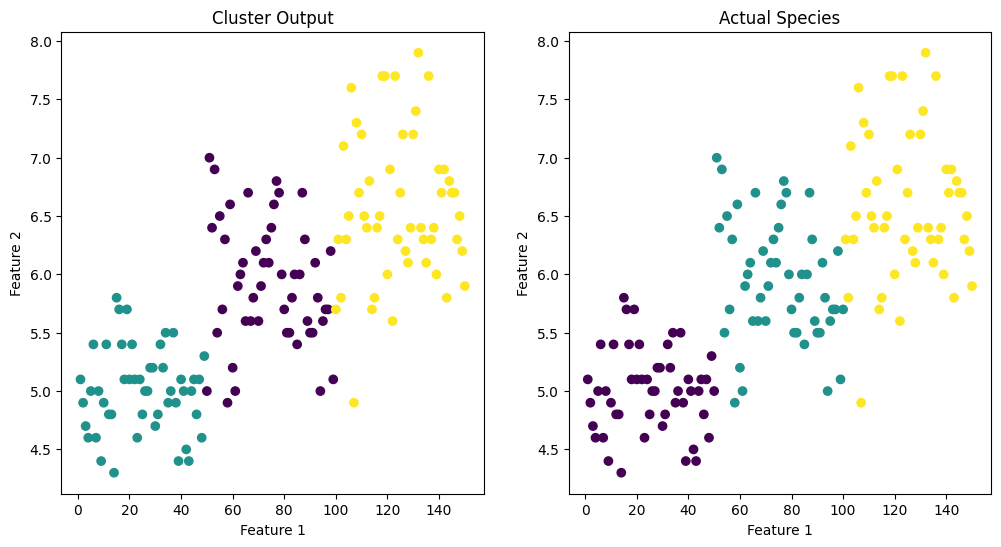

In [8]:
# Plot the clustering results
plot_clustering(features, assigned_clusters, labels)
